# Regression Project

In this project, your goal is to build regression models of housing prices. The models should learn from data and be able to predict the median house price in a district (which is a population of 600 to 3000 people), given some predictor variables. 

Note

>This notebook shall be a cleaned up version of the previous regression notebook. It will not cover everything from the regrssion notebook (only best model). And I try to avoid some mistakes I made in the original notebook. Moreover Ill try to do the data split before I start with the work on the data



## Plan
### Identify Use Case
We want to build a regression model for the median house price for certain districts. Goal is to predict the median_house_price based on the available data and variables for districts.
We want to train the data, evaluate models and test them with the test data. Therefore we need to split the data before we start with the modelling. We are owning a  company which is investing in houses and flats. Based on the development of our changes in the variables we want to predict how the prices will behave afterwards. This regression will be a basis on our inverstment and sell strategy of our houses and flats.

### Frame problem
There are some variables in the table which are not necessary and can be dropped. Moreover we need to adjust the data in the table so that it can be worked with them. E.g. Data needs to be preprocessed, cleaned and variables need to be adjusted (total_rooms & total_bedrooms need to be adapted so that it is in average for each house). For the city districts we want to predict the house prices so that we can adapt our strategy so that we can maximize our profit.

### Identify variables
Our response variable is the median_house-value, which shall be predicted after we built the model and trained and tested it. If the price_category is set correclty then this is the response variable, to see if the price is above or below the median house price. Basically both variables are important as response variables for our model
longitude and latitude can be dropped, that wont effect the data. Because both only make sense combined. Althought the location of a house affects the price, in this case both are only useful combined and each row display a whole district. So the longitude and latitude data it self wont affect the housing price in a logical order
- housing_median__age is a useful variable and shall be used as a predictor
- total_rooms and total_bedrooms need to be reduced to the average per household otherwise it does not make sense
- population and household makes sense to use for the data model. Even thought both affect each other. If there are more people, there will be also more households. The data analysis will show how to use them
- median_income is a useful variable and shall be used as a predictor
- ocean_proximity is a useful variable and shall be used as a predictor

### Define metrics
The goal of our company is predict the price development based on certrain varaibles to decide wheather to buy or sell house/flats. Project is successfull if the prediction is on average only 30.000 away from the actual price.


## Python setup

In [1]:
# Python setup as described in Regression basics and Regression diagnostics 

import numpy as np 
import pandas as pd 
from patsy import dmatrices

from scipy import stats 
import statsmodels.formula.api as smf

from statsmodels.compat import lzip
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrices
import matplotlib.pyplot as plt 
import seaborn as sns 

# seaborn settings
costum_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=costum_params)

%matplotlib inline 
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [2]:
# Check version of skitlearn
import sklearn

print('scikit-learn version:', sklearn.__version__)

scikit-learn version: 1.0.2


Version is 1.0.2 --> latest version

## Import Data/Data Ingestion

In [3]:
# import data 
# in this case I have used a formula from stackoverflow, because I was not able to make it work with ROOT + DATA or the other formulas from the notebooks
# Link to stackoverflow: https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas 

url = "https://raw.githubusercontent.com/jan-kirenz/project-DanielSteck/main/project_data.csv?token=GHSAT0AAAAAABP5WYYS3N7LIECOFSXXBYGMYPLZQ3A"
df = pd.read_csv(url)

In [4]:
# check if data import was succesful
df

longitude  latitude housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88          41.0years          880           129.0   
1        -122.22     37.86               21.0         7099          1106.0   
2        -122.24     37.85               52.0         1467           190.0   
3        -122.25     37.85               52.0         1274           235.0   
4        -122.25     37.85               52.0         1627           280.0   
...          ...       ...                ...          ...             ...   
20635    -121.09     39.48               25.0         1665           374.0   
20636    -121.21     39.49               18.0          697           150.0   
20637    -121.22     39.43               17.0         2254           485.0   
20638    -121.32     39.43               18.0         1860           409.0   
20639    -121.24     39.37               16.0         2785           616.0   

       population  households  median_income median_house_value  \
0             322         126         8.3252          452600.0$   
1            2401        1138         8.3014           358500.0   
2             496         177         7.2574           352100.0   
3             558         219         5.6431           341300.0   
4             565         259         3.8462           342200.0   
...           ...         ...            ...                ...   
20635         845         330         1.5603            78100.0   
20636         356         114         2.5568            77100.0   
20637        1007         433         1.7000            92300.0   
20638         741         349         1.8672            84700.0   
20639        1387         530         2.3886            89400.0   

      ocean_proximity price_category  
0            NEAR BAY          above  
1            NEAR BAY          above  
2            NEAR BAY          above  
3            NEAR BAY          above  
4            NEAR BAY          above  
...               ...            ...  
20635          INLAND          above  
20636          INLAND          above  
20637          INLAND          above  
20638          INLAND          above  
20639          INLAND          above  

[20640 rows x 11 columns]

In [5]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  object 
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  object 
 9   ocean_proximity     20640 non-null  object 
 10  price_category      20640 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.7+ MB


In [6]:
# show all variables in the data set
df. columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'price_category'],
      dtype='object')

**Explanation for the columns** :

- housing_median_age: Median age of a house within a district; a lower number is a newer building
- total_rooms: Total number of rooms within a district
- total_bedrooms: Total number of bedrooms within a district
- population: Total number of people residing within a district
- households: Total number of households, a group of people residing within a home unit, for a district
- median_income: Median income for households within a district of houses (measured in tens of thousands of US Dollars)
- median_house_value: Median house value within a district (measured in US Dollars)
- ocean_proximity: Location of the district
- price_category: Indicator variable made from median_house_value (if median house value is below or above 150000)

### Clean Data
First line (line 0) has to wrong values (housing median age: 41years and median_house_value). Since there is only this row affected and the data seems correct, it will be manually adapted.

Afterwards the data type can be changed to float64 (int64 would also be possible, but it might be possible, that there might decimal places)

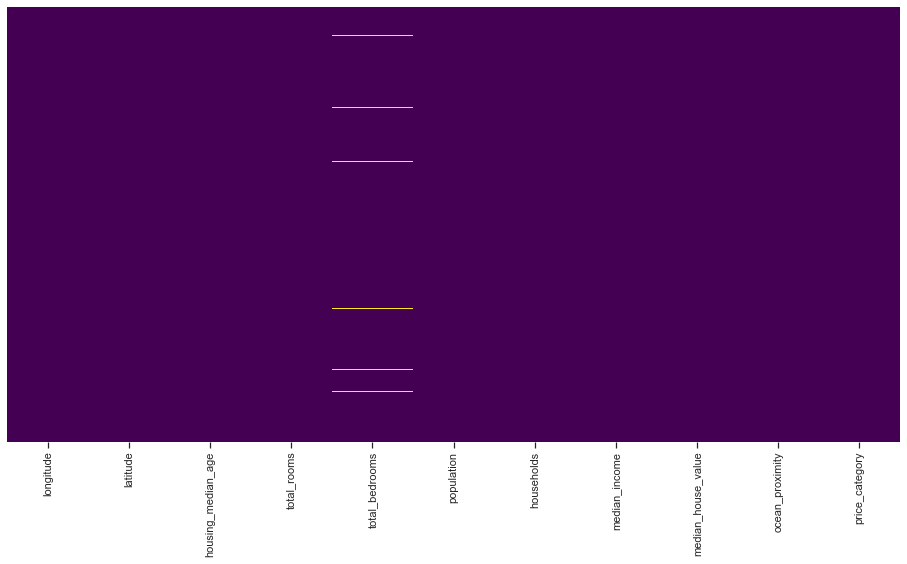

In [7]:
# show missing values (missing values - if present - will be displayed in yellow)
sns.heatmap(df.isnull(), 
            yticklabels=False,
            cbar=False, 
            cmap='viridis');

In [8]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
price_category          0
dtype: int64


There are 207 lines where we do not have a value for the amount of total bedrooms!

What was learned from the data Inscpetion:

- First line (line 0) has to wrong values (housing median age: 41years and median_house_value). I will manually adjust these data, so that it will be correct, instead of dropping the whole line. Afterwards the data type can be changed to float64 (int64 would also be possible, but it might be possible, that there might decimal places)
- There are 207 lines where we do not have a value for the amount of total bedrooms! --> Normally the preprocessor pipeline would take care of that, but that is only working with scikit. I am removing these rows now, because statsmodels would get some problems with empty rows, that is why I am removing these rows before the data split.

In [9]:
# replace the data in line 0
df['housing_median_age'] = df['housing_median_age'].replace(['41.0years'], '41.0')
df['median_house_value'] = df['median_house_value'].replace(['452600.0$'], '452600.0')

# change data type
df['housing_median_age'] = pd.Float64Index(df['housing_median_age'])
df['median_house_value'] = pd.Float64Index(df['median_house_value'])
df['ocean_proximity'] =pd.Categorical(df['ocean_proximity'])
df['price_category'] =pd.Categorical(df['price_category'])

# check the data
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                52.0         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252            452600.0   
1            2401        1138         8.3014            358500.0   
2             496         177         7.2574            352100.0   
3             558         219         5.6431            341300.0   
4             565         259         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635         845         330         1.5603             78100.0   
20636         356         114         2.5568             77100.0   
20637        1007         433         1.7000             92300.0   
20638         741         349         1.8672             84700.0   
20639        1387         530         2.3886             89400.0   

      ocean_proximity price_category  
0            NEAR BAY          above  
1            NEAR BAY          above  
2            NEAR BAY          above  
3            NEAR BAY          above  
4            NEAR BAY          above  
...               ...            ...  
20635          INLAND          above  
20636          INLAND          above  
20637          INLAND          above  
20638          INLAND          above  
20639          INLAND          above  

[20640 rows x 11 columns]

In [10]:
# check if the data types were changed succesfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
 10  price_category      20640 non-null  category
dtypes: category(2), float64(6), int64(3)
memory usage: 1.5 MB


In [11]:
# change column name, so that the naming is similar to the other colum names

df.rename(columns = {
    "housing_median_age": "median_housing_age"},
inplace=True)

df

longitude  latitude  median_housing_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                52.0         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252            452600.0   
1            2401        1138         8.3014            358500.0   
2             496         177         7.2574            352100.0   
3             558         219         5.6431            341300.0   
4             565         259         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635         845         330         1.5603             78100.0   
20636         356         114         2.5568             77100.0   
20637        1007         433         1.7000             92300.0   
20638         741         349         1.8672             84700.0   
20639        1387         530         2.3886             89400.0   

      ocean_proximity price_category  
0            NEAR BAY          above  
1            NEAR BAY          above  
2            NEAR BAY          above  
3            NEAR BAY          above  
4            NEAR BAY          above  
...               ...            ...  
20635          INLAND          above  
20636          INLAND          above  
20637          INLAND          above  
20638          INLAND          above  
20639          INLAND          above  

[20640 rows x 11 columns]

Dropping irrelevant features: longitude, latitude wont affect the median_house_value. Moreover the price_category may not be used here, because this column is based on the median_house_value

In [12]:
# Drop irrelevant features
df = df.drop(['longitude', 'latitude', 'price_category'], axis=1)

Adding new colums to the table.

Background: Total_rooms & total_bedrooms is not comparable if in one district are 100 households and in one 500 households --> calculation per household Also for the avg. size per household to see how big the household and therefore the flat is (even though it is already included in the avg_rooms_per_household)

Moreover the unit from median_income has to be identical to the unit from median_house_value. Thats why both will be in $.

Afterwards the total_rooms and total_bedrooms can be dropped, because it is already included via the avg_per_household

In [13]:
# calculate average rooms per household: total_rooms/households
df['avg_rooms_per_household'] = round(df['total_rooms']/df['households'],2)
# calculate average bedrooms per households: total_bedromms/ househols
df['avg_bedrooms_per_household'] = round(df['total_bedrooms']/df['households'],2)
# calculate average household size: population/households
df['avg_size_per_household'] = round(df['population']/df['households'],2)

# get the median income in $ and not in 10.000$
df['median_income']= df['median_income']*10000

df = df.drop(['total_rooms', 'total_bedrooms'], axis=1)

df

median_housing_age  population  households  median_income  \
0                    41.0         322         126        83252.0   
1                    21.0        2401        1138        83014.0   
2                    52.0         496         177        72574.0   
3                    52.0         558         219        56431.0   
4                    52.0         565         259        38462.0   
...                   ...         ...         ...            ...   
20635                25.0         845         330        15603.0   
20636                18.0         356         114        25568.0   
20637                17.0        1007         433        17000.0   
20638                18.0         741         349        18672.0   
20639                16.0        1387         530        23886.0   

       median_house_value ocean_proximity  avg_rooms_per_household  \
0                452600.0        NEAR BAY                     6.98   
1                358500.0        NEAR BAY                     6.24   
2                352100.0        NEAR BAY                     8.29   
3                341300.0        NEAR BAY                     5.82   
4                342200.0        NEAR BAY                     6.28   
...                   ...             ...                      ...   
20635             78100.0          INLAND                     5.05   
20636             77100.0          INLAND                     6.11   
20637             92300.0          INLAND                     5.21   
20638             84700.0          INLAND                     5.33   
20639             89400.0          INLAND                     5.25   

       avg_bedrooms_per_household  avg_size_per_household  
0                            1.02                    2.56  
1                            0.97                    2.11  
2                            1.07                    2.80  
3                            1.07                    2.55  
4                            1.08                    2.18  
...                           ...                     ...  
20635                        1.13                    2.56  
20636                        1.32                    3.12  
20637                        1.12                    2.33  
20638                        1.17                    2.12  
20639                        1.16                    2.62  

[20640 rows x 9 columns]

In [14]:
# drop remaining rows with one missing value
df = df.dropna()

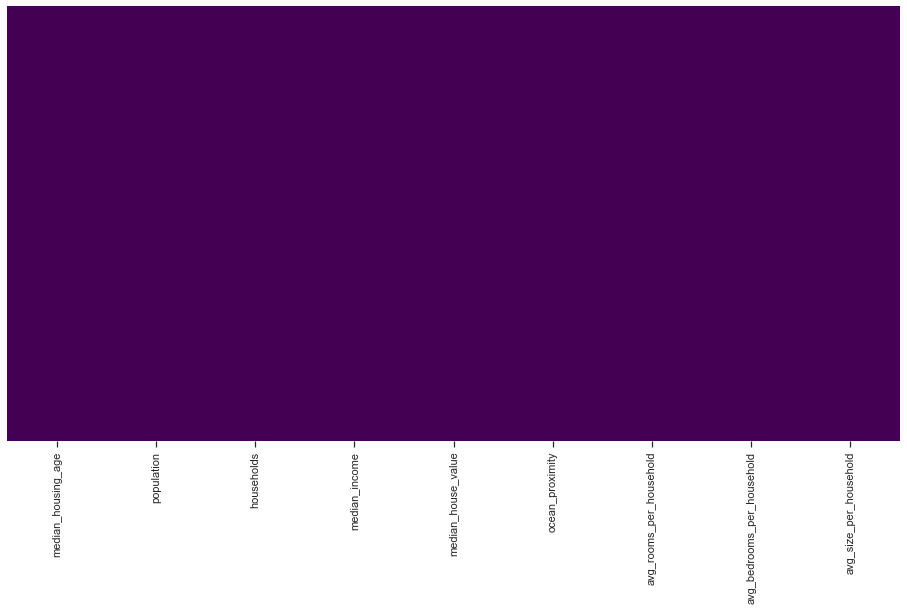

In [15]:
# show missing values --> Check if the lines were dropped successfully
sns.heatmap(df.isnull(), 
            yticklabels=False,
            cbar=False, 
            cmap='viridis');

In [16]:
# check column-wise distribution of null values
print(df.isnull().sum())

median_housing_age            0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
avg_rooms_per_household       0
avg_bedrooms_per_household    0
avg_size_per_household        0
dtype: int64


Rows with missing values were dropped successfully

## Data splitting

In [17]:
train_dataset = df.sample(frac=0.8, random_state=10)
test_dataset = df.drop(train_dataset.index)

## Analyze data

Note:
> In this notebook I will not remove the data outliners to ensure that I do not change anything in the results, therefore the boxplots will be including the outliners/points with high leverage
### Exploration data analysis

In [18]:
train_dataset.describe()

median_housing_age    population    households  median_income  \
count        16346.000000  16346.000000  16346.000000   16346.000000   
mean            28.618989   1422.263551    499.071027   38653.440781   
std             12.628879   1113.536311    384.053981   18915.374420   
min              1.000000      3.000000      1.000000    4999.000000   
25%             18.000000    785.000000    279.000000   25605.250000   
50%             29.000000   1167.000000    409.000000   35313.000000   
75%             37.000000   1725.000000    602.000000   47422.000000   
max             52.000000  28566.000000   6082.000000  150001.000000   

       median_house_value  avg_rooms_per_household  \
count        16346.000000             16346.000000   
mean        206499.306313                 5.440657   
std         115354.953726                 2.589064   
min          14999.000000                 0.850000   
25%         118900.000000                 4.440000   
50%         179350.000000                 5.235000   
75%         264300.000000                 6.060000   
max         500001.000000               141.910000   

       avg_bedrooms_per_household  avg_size_per_household  
count                16346.000000            16346.000000  
mean                     1.098783                3.087792  
std                      0.492901               11.509232  
min                      0.330000                0.690000  
25%                      1.010000                2.430000  
50%                      1.050000                2.820000  
75%                      1.100000                3.280000  
max                     34.070000             1243.330000

What can be seen in this data:

the mean values of each variable are:

- **28.618989** for median_housing_age 
- **1422.263551** for population 
- **499.071027** for households 
- **38653.440781** for median_income 
- **5.440657** avg_rooms_per_household 
- **1.098783** avg_bedrooms_per_household 
- **3.087792** avg_size_per_household 
- **206499.306313** for median_house_value 

Further findings:
- Avg bedrooms per household has almost no variation (most values between 1.01 and 1.1), probably this wont affect the median_house_value, but this shall be analyzed with plots
- I assume there are some errors in the dataset, for example the max value of avg_size_per_household. --> I do not believe that in a district are living on average 600 persons in one household.... But in this notebook these errors/outliners will not be removed with cooks distance, so they will be kept in the dataset
- The standard deviations are quite high... So I have the situation in which data points are widely spread from the mean.



### Distribution

Visualization of differences

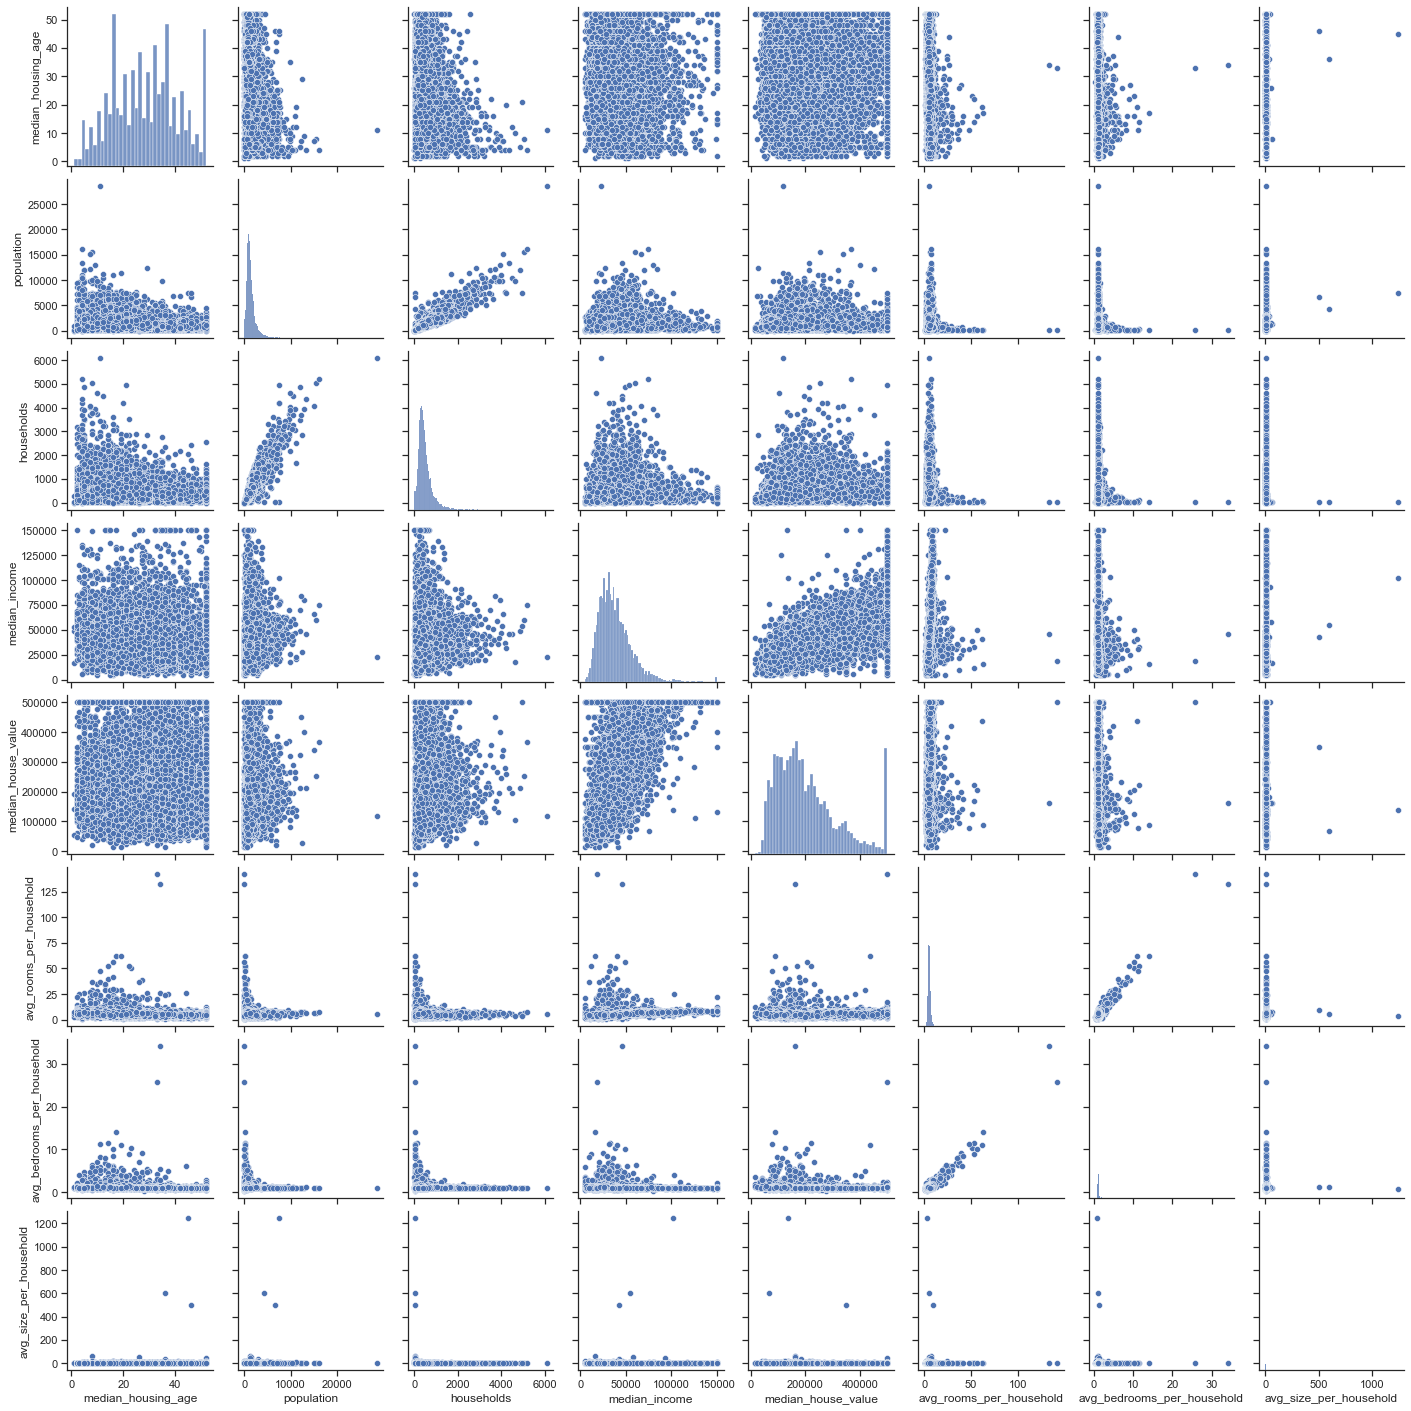

In [19]:
sns.pairplot (data=train_dataset)

It is hard to find the impact of each variable due to the huge amount of data. 

What can be seen: 

- Positive association between **median_house_value** and **median_income** which is linear
- There might be positive associations between **median_house_value** and **avg_rooms_per_household** as well as **median_house_value** and **population** as all as **median_house_value** and **households** --> It is hard so state this clearly

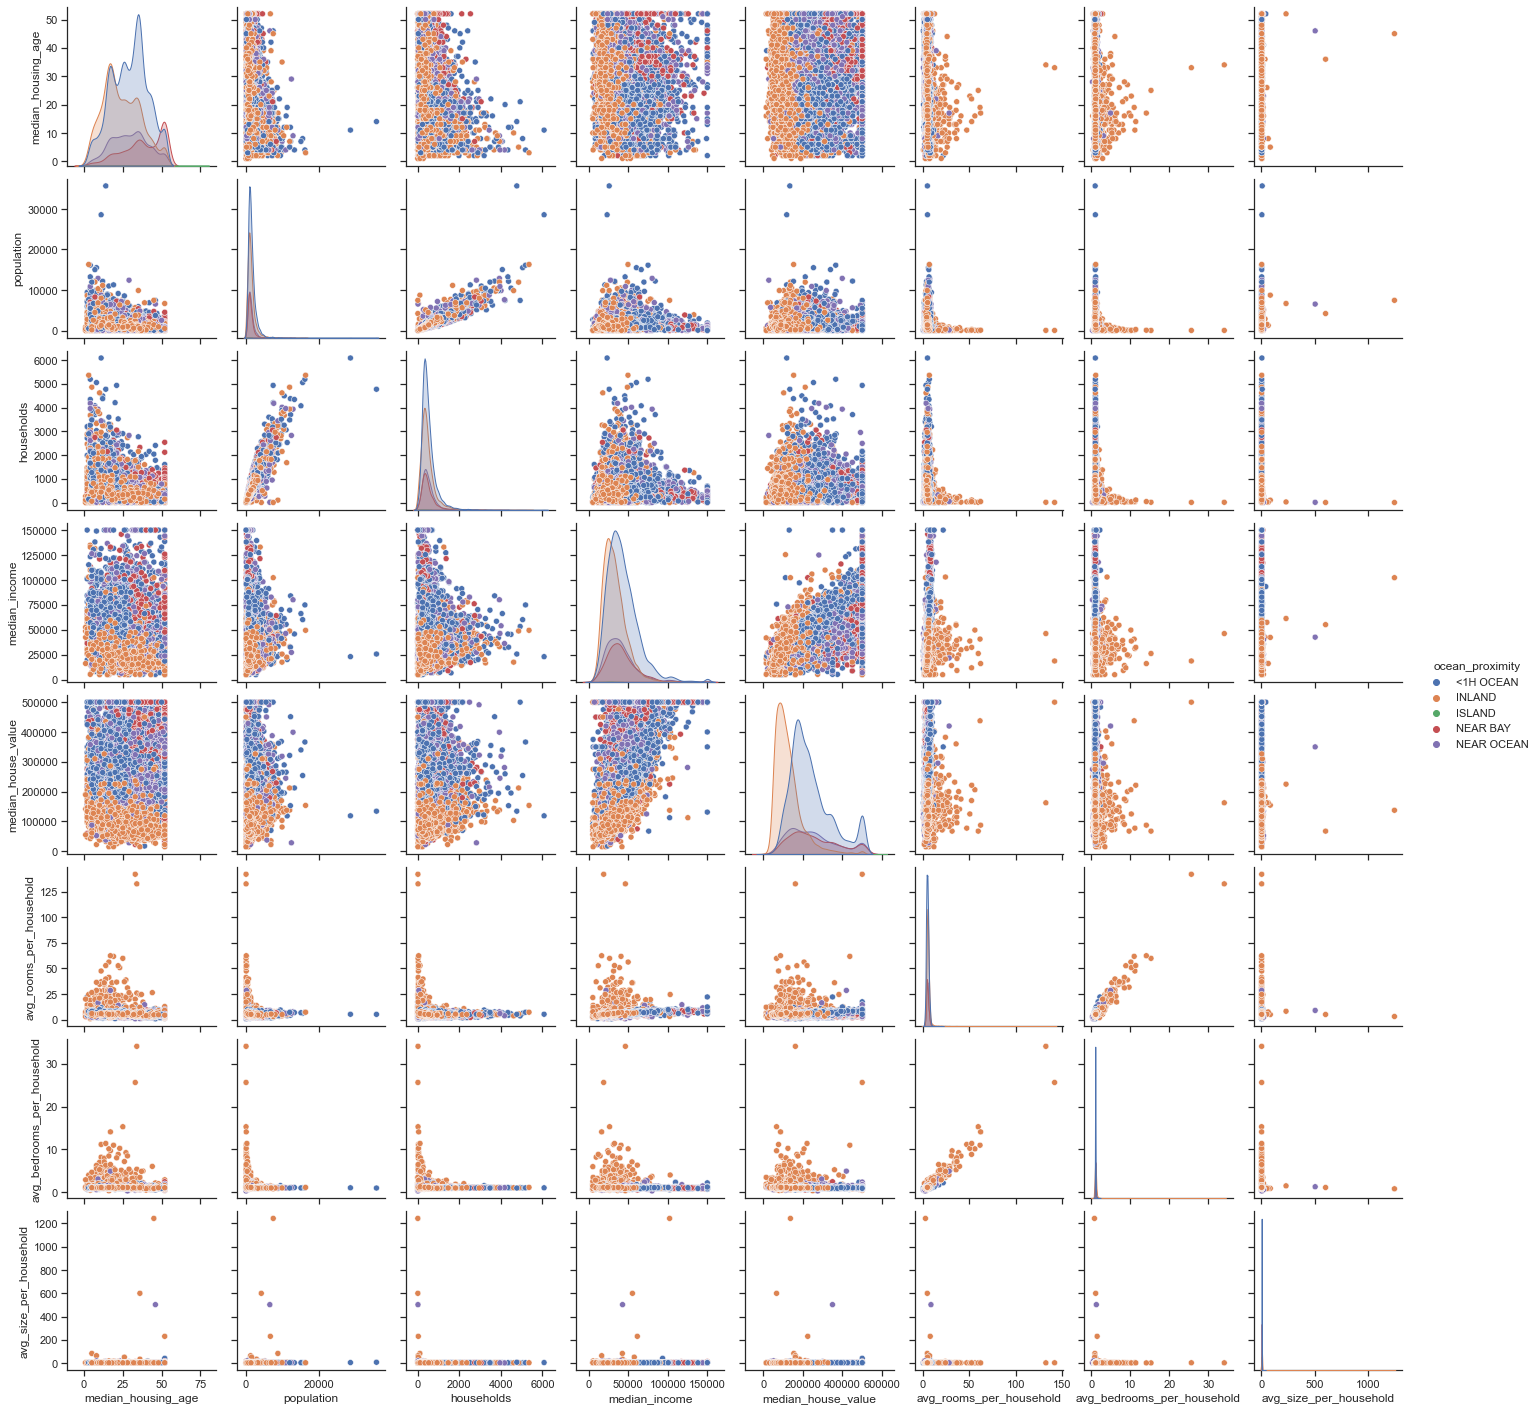

In [20]:
# now lets include the categorical variable ocean_proximity to the pairplot
sns.pairplot(df, hue="ocean_proximity");

Impact of ocean proximity to median house value:
- Inland leads to a lower house value, all orange dots are more on the left side of the graphs with median_house_value. 
- <1H Ocean has some influence on the median_house_value. Blue dots are in the middle and on the right side of the graphs with median house value.
- Inland and <1H ocean are occuring way more often than the Island, Near Bay and Near Ocean
- For Island I can not see a difference between the median house value, because I can not really identify green dots
- Near Bay and Near Ocean may lead to a higher median house value (see later in detail)

Now lets have a look on the influence of each variable to the median_house_value

<AxesSubplot:xlabel='median_housing_age', ylabel='median_house_value'>

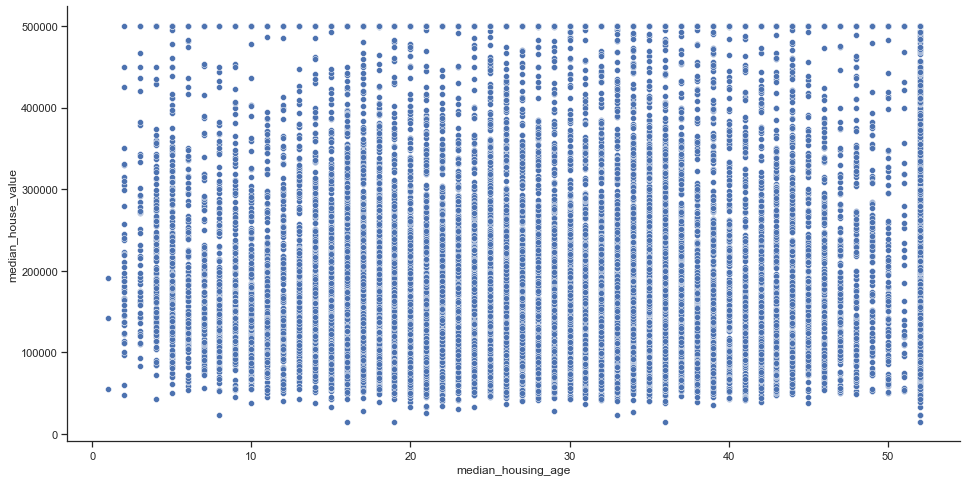

In [21]:
sns.scatterplot(data=train_dataset, x='median_housing_age', y='median_house_value')

This variable has no influence on the median_house_value. Atleast I cannot see that it affects it. So this variable wont be added to the model.

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

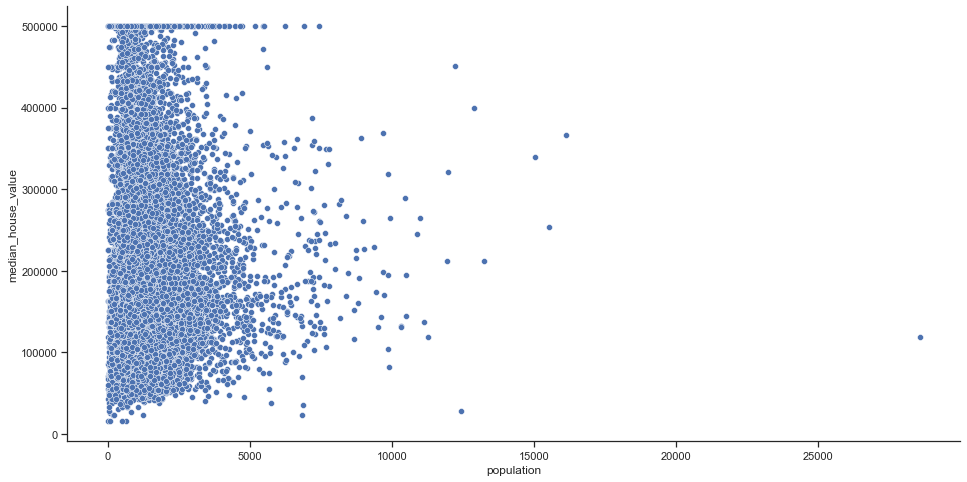

In [22]:
sns.scatterplot(data=train_dataset, x='population', y='median_house_value')

Looks like this variable has an effect on the median_house_value, but it is hard to state this clear due to the huge amount of data

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

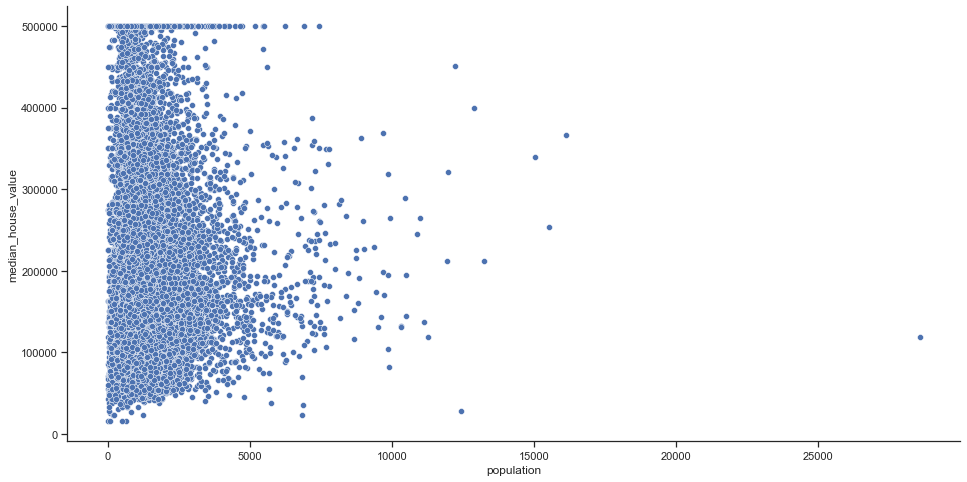

In [23]:
sns.scatterplot(data=train_dataset, x='population', y='median_house_value')

Looks like this variable has an effect on the median_house_value, but it is hard to state this clear due to the huge amount of data

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

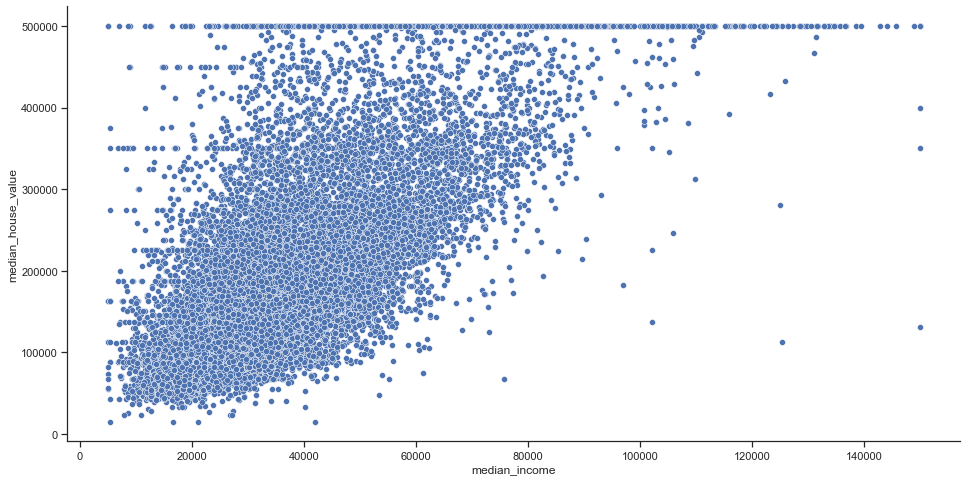

In [24]:
sns.scatterplot(data=train_dataset, x='median_income', y='median_house_value')

For this variable it can be seen that this variable has a strong influence on the median_house_value. A strong and positive association can be seen here. This variable will be added for sure to the model.

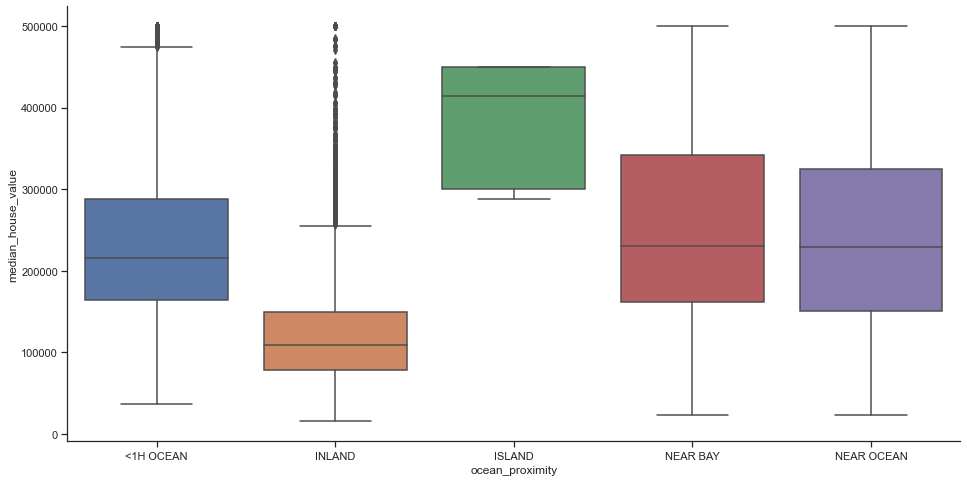

In [25]:
#boxplot
sns.boxplot(data=train_dataset, y="median_house_value", x="ocean_proximity");

It can be seen, that this variables has also an influence on the median_house_value, therefore this variable should be added to the model as well

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

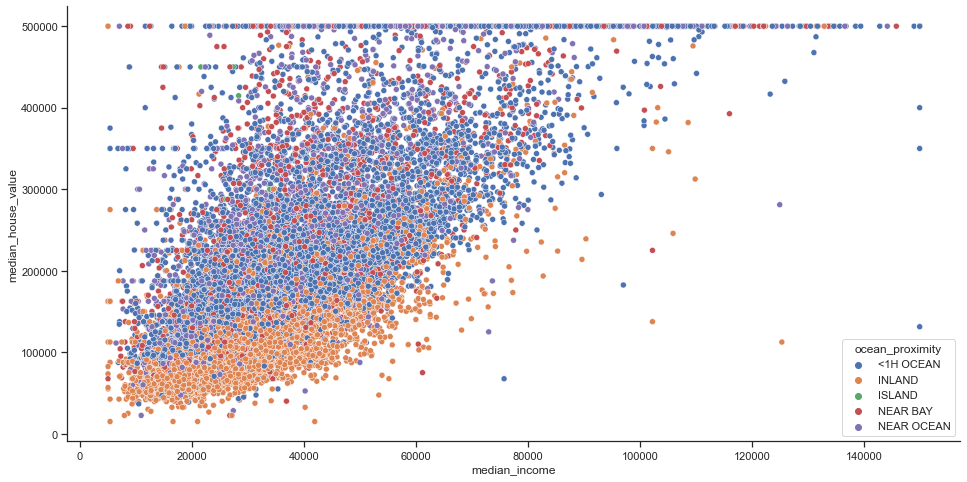

In [26]:
sns.scatterplot(data=train_dataset, x='median_income', y='median_house_value', hue="ocean_proximity")

For sure the Inland affects the mednian_house_value (lower house value). 
For <1h ocean it is hard to say, because it is speaded a lot, but blue is mainly on a median_house_value above 100.000.
Actually I can not really see the dots for Island, but in the boxplot I saw, that is leads to a higher median_house_value
For near ocean and near bay I can not really see a difference

<AxesSubplot:xlabel='avg_rooms_per_household', ylabel='median_house_value'>

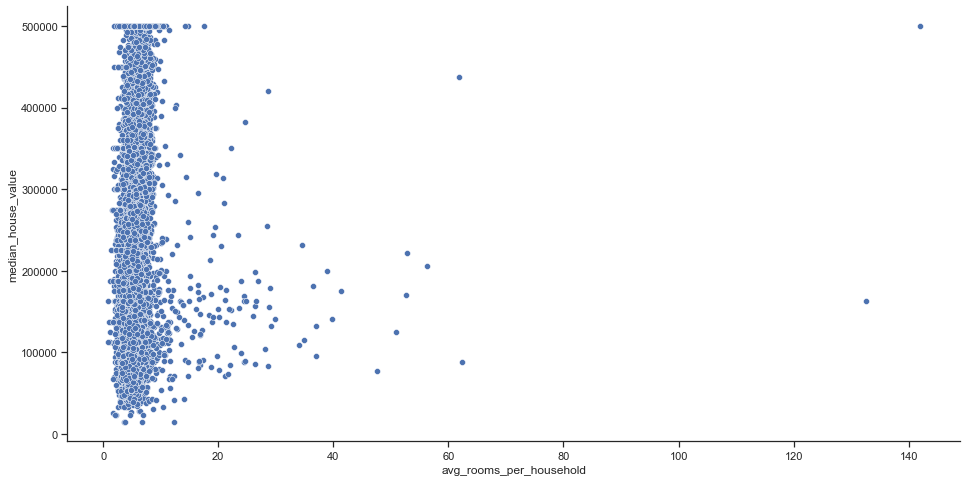

In [27]:
sns.scatterplot(data=train_dataset, x='avg_rooms_per_household', y='median_house_value')

It is hard to see the influence of this variable due to the huge amount of data. I would say that there is no big influence.

<AxesSubplot:xlabel='avg_bedrooms_per_household', ylabel='median_house_value'>

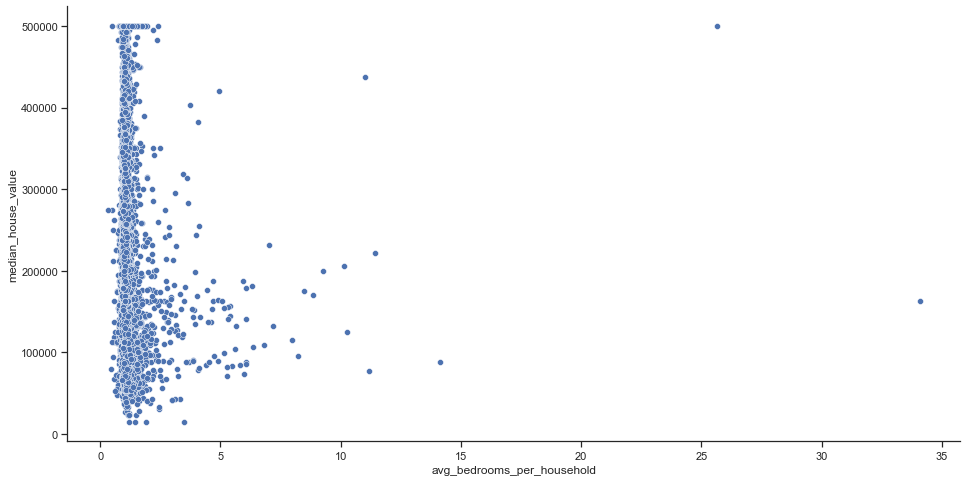

In [28]:
sns.scatterplot(data=train_dataset, x='avg_bedrooms_per_household', y='median_house_value')

It is hard to see the influence of this variable due to the huge amount of data. I would say that there is no big influence.

<AxesSubplot:xlabel='avg_size_per_household', ylabel='median_house_value'>

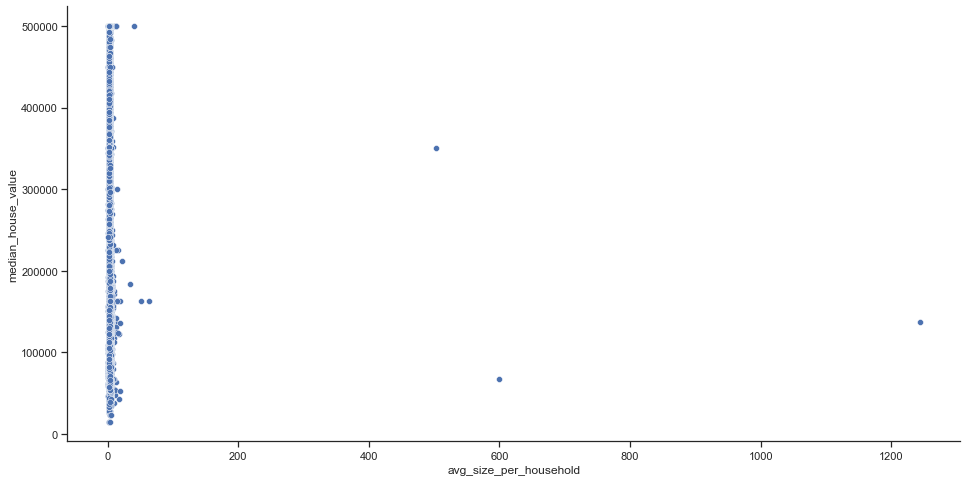

In [29]:
sns.scatterplot(data=train_dataset, x='avg_size_per_household', y='median_house_value')

I can not see any influence from this variable

Moreover: Some median_house_values are at 500.000 no matter of what each variable says... Are these data errors? For sure this has a big impact on the model and the results of the model. No matter what each variable says, it seems like some avalues are randomly at 500.000

## Correlation analysis

In [30]:
# Create correlation matrix for numerical variables
# Zusammenhang zwischen 2 Variablen, korrelationskoeffizient bewegt sich zwischen -1 und +1
corr_matrix = train_dataset.corr()
corr_matrix

median_housing_age  population  households  \
median_housing_age                    1.000000   -0.302950   -0.305595   
population                           -0.302950    1.000000    0.916218   
households                           -0.305595    0.916218    1.000000   
median_income                        -0.123535    0.020707    0.027964   
median_house_value                    0.103399   -0.015682    0.075073   
avg_rooms_per_household              -0.152989   -0.067386   -0.074256   
avg_bedrooms_per_household           -0.077652   -0.067579   -0.055027   
avg_size_per_household                0.013902    0.068055   -0.026872   

                            median_income  median_house_value  \
median_housing_age              -0.123535            0.103399   
population                       0.020707           -0.015682   
households                       0.027964            0.075073   
median_income                    1.000000            0.687492   
median_house_value               0.687492            1.000000   
avg_rooms_per_household          0.312207            0.147029   
avg_bedrooms_per_household      -0.058838           -0.040563   
avg_size_per_household           0.021399           -0.022245   

                            avg_rooms_per_household  \
median_housing_age                        -0.152989   
population                                -0.067386   
households                                -0.074256   
median_income                              0.312207   
median_house_value                         0.147029   
avg_rooms_per_household                    1.000000   
avg_bedrooms_per_household                 0.861655   
avg_size_per_household                    -0.005687   

                            avg_bedrooms_per_household  avg_size_per_household  
median_housing_age                           -0.077652                0.013902  
population                                   -0.067579                0.068055  
households                                   -0.055027               -0.026872  
median_income                                -0.058838                0.021399  
median_house_value                           -0.040563               -0.022245  
avg_rooms_per_household                       0.861655               -0.005687  
avg_bedrooms_per_household                    1.000000               -0.006686  
avg_size_per_household                       -0.006686                1.000000

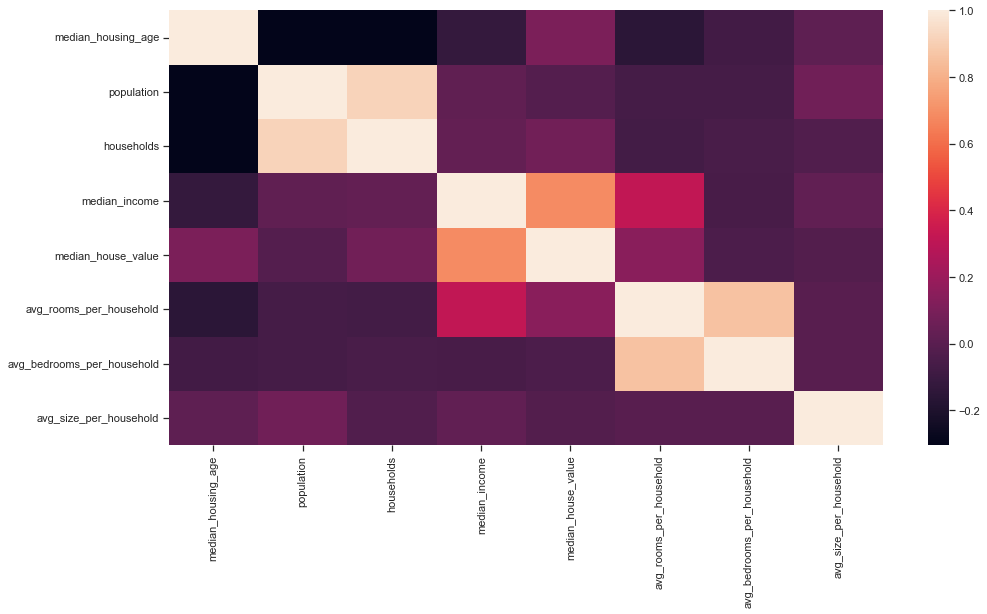

In [31]:
# Simple heatmap
heatmap = sns.heatmap(corr_matrix)

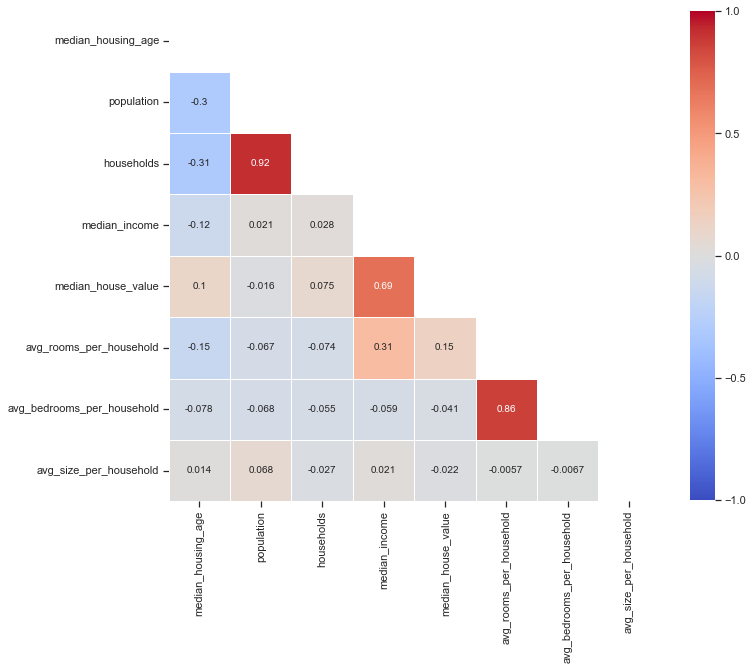

In [32]:
# Make a pretty heatmap

# Use a mask to plot only part of a matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= True

# Change size
plt.subplots(figsize=(11, 15))

# Build heatmap with additional options
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})

Mainly the median_income has an effect on the median_house_value,(as already seen with the plots). Moreover ocean_proximity is not included here, which also has an effect on the model

## VIF factor

In [33]:
from patsy import dmatrices

y, X =dmatrices('median_house_value ~ median_housing_age + population + households + median_income + avg_rooms_per_household + avg_bedrooms_per_household + avg_size_per_household + ocean_proximity', train_dataset, return_type='dataframe')

# For each X. calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["Feature"] = X.columns

vif.round(2)

VIF Factor                        Feature
0        33.14                      Intercept
1         1.50      ocean_proximity[T.INLAND]
2         1.00      ocean_proximity[T.ISLAND]
3         1.18    ocean_proximity[T.NEAR BAY]
4         1.14  ocean_proximity[T.NEAR OCEAN]
5         1.31             median_housing_age
6         6.89                     population
7         6.95                     households
8         2.57                  median_income
9         9.47        avg_rooms_per_household
10        8.15     avg_bedrooms_per_household
11        1.06         avg_size_per_household

Interpretation from the VIF factor. Almost all variables have a very high VIF Factor (above 5). Therefore these should be excluded from the model.
The only variables left are:

- Ocean_proximity
- median_housing_age
- median_income
- avg_size_per_household

Process with various models will be skipped here, It was already made at the regression notebook

Even thought it was seen on the plots, that only Ocean_proximity and median_income have a big influence on the housing price, I will continue here with those 4 variables (in the regression notebook I made the models with only median_income and ocean_proximity and many more)

## Feature engineering

This step was already made at the start of the notebook. After understanding the data I made more logicall variables and changed the unit from median_income. That is why here is no further feature engineering.

## Model

The model will contain the 4 variables which were identified in the data analysis (various models were meda in the regression notebook, those will be skipped here).

In [34]:
# Fit Model
lm = smf.ols(formula='median_house_value ~ median_income + ocean_proximity + median_housing_age + avg_size_per_household', data=train_dataset).fit()

In [35]:
# summary of our model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     3459.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:55:53   Log-Likelihood:            -2.0629e+05
No. Observations:               16346   AIC:                         4.126e+05
Df Residuals:                   16338   BIC:                         4.127e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      5.099e+04   2315.017     22.026      0.000    4.65e+04    5.55e+04
ocean_proximity[T.INLAND]     -7.105e+04   1404.756    -50.576      0.000   -7.38e+04   -6.83e+04
ocean_proximity[T.ISLAND]      1.848e+05   3.28e+04      5.640      0.000    1.21e+05    2.49e+05
ocean_proximity[T.NEAR BAY]    1.191e+04   1971.966      6.040      0.000    8045.581    1.58e+04
ocean_proximity[T.NEAR OCEAN]   1.88e+04   1814.758     10.358      0.000    1.52e+04    2.24e+04
median_income                     3.8382      0.032    120.534      0.000       3.776       3.901
median_housing_age              944.8639     48.703     19.401      0.000     849.401    1040.327
avg_size_per_household         -324.4674     49.816     -6.513      0.000    -422.112    -226.823
==============================================================================
Omnibus:                     3767.814   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10431.572
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     2.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Adjusted R squared 
print('Adjusted R squared is:', lm.rsquared_adj)

# R sqaured
print('R squared is:', lm.rsquared)

# F-Statistic
print('F-Statistic is:', lm.fvalue)


Adjusted R squared is: 0.596892546967586
R squared is: 0.5970651839924392
F-Statistic is: 3458.50019426518


Even though the model includes the same variables as the model in scikit learn the R2 value is worse.

In [37]:
# Add the regression predictions (as "pred") to our DataFrame
train_dataset['y_pred'] = lm.predict()

train_dataset

median_housing_age  population  households  median_income  \
18256                36.0        1055         410        61995.0   
3598                 32.0        1040         344        61550.0   
8568                 29.0         686         455        55347.0   
16405                44.0         287          83        33882.0   
17780                33.0         781         169        51082.0   
...                   ...         ...         ...            ...   
16128                52.0        1078         494        35221.0   
19977                20.0         658         247        23937.0   
19601                27.0         449         168        26406.0   
13275                15.0        2554        1057        26582.0   
17495                27.0        1176         416        50294.0   

       median_house_value ocean_proximity  avg_rooms_per_household  \
18256            407200.0        NEAR BAY                     6.31   
3598             257300.0       <1H OCEAN                     7.01   
8568             500001.0       <1H OCEAN                     4.24   
16405            125000.0          INLAND                     7.33   
17780            195800.0       <1H OCEAN                     4.94   
...                   ...             ...                      ...   
16128            443300.0        NEAR BAY                     4.83   
19977             82100.0          INLAND                    18.79   
19601            129700.0          INLAND                     5.51   
13275            122800.0          INLAND                     4.54   
17495            280200.0      NEAR OCEAN                     6.43   

       avg_bedrooms_per_household  avg_size_per_household         y_pred  
18256                        1.01                    2.57  334030.866301  
3598                         1.10                    3.02  316486.565304  
8568                         1.15                    1.51  290333.766717  
16405                        1.30                    3.46  150440.252241  
17780                        1.07                    4.62  276734.344204  
...                           ...                     ...            ...  
16128                        1.03                    2.18  246512.134412  
19977                        5.26                    2.66   89852.518150  
19601                        1.05                    2.67  105939.755948  
13275                        1.14                    2.42   95358.024014  
17495                        1.01                    2.83  287418.732434  

[16346 rows x 10 columns]

In [38]:
# MSE
print('MSE of the model is:', mse(train_dataset['median_house_value'], train_dataset['y_pred']))

#RMSE
print('RMSE of the model is:', rmse(train_dataset['median_house_value'], train_dataset['y_pred']))

MSE of the model is: 5361431030.985496
RMSE of the model is: 73221.79341552278


Even though the model includes the same variables as the model in scikit learn the RMSE value is worse.

## Regression diagonstics


### Outliners and high-leverage points

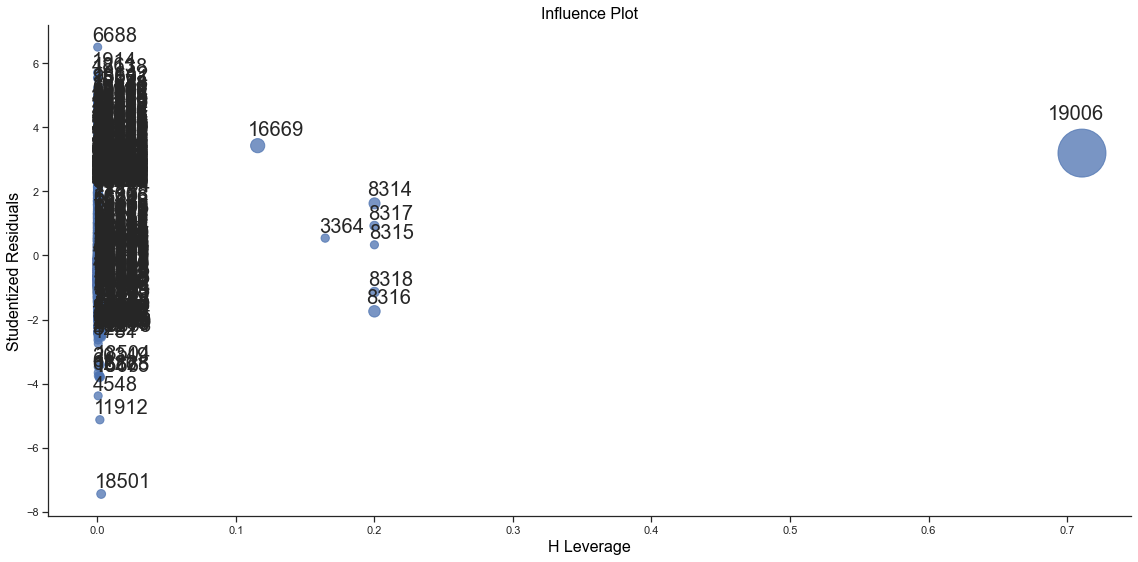

In [39]:
fig = sm.graphics.influence_plot(lm, criterions='cooks')
fig.tight_layout(pad=1.0)

To identify values with high influence, we look for observations with:

- big blue points (high Cook’s distance) and

- high leverage (X-axis) which additionally have

- high or low studentized residuals (Y-axis).

For sure I can say that there are values with high influence, atleast for:

- 19006
- 8314
- 8317
- 8315
- 8318
- 8316
- 3364
- 16669
- 18501
- 6688

For all other I can not interpretate it due to the huge amount of data

--> Outliners will be analyzed via Cooks distance

In [40]:
# obtains Cook's distance
fit_cooksd = lm.get_influence().cooks_distance[0]

# get lenght of df to obtain n

n = len(train_dataset["median_housing_age"])

# calculate critical d
critical_d =4/n
print('Critical Cooks distance', critical_d)

# identification of potential outliers with Levarage
out_d = fit_cooksd > critical_d

# output potential outliers with levarage
print(train_dataset.index[out_d], "\n",
        fit_cooksd[out_d])




Critical Cooks distance 0.0002447081854888046
Int64Index([13374, 15805,  5297,  4719, 15828,   783, 18263,  4692, 17321,
            19006,
            ...
            17201, 16018, 18957,  4713,  1914, 10654,  6592, 14748, 17137,
            16128],
           dtype='int64', length=769) 
 [2.92669925e-04 4.91341481e-04 2.67283625e-04 3.11323865e-04
 3.30468951e-04 2.47452619e-04 2.83516770e-04 4.25059078e-04
 1.19182197e-03 3.13854927e+00 3.02921853e-04 3.36901013e-04
 1.48390966e-03 1.09766500e-03 3.36408599e-04 3.97364400e-04
 3.85569000e-04 5.76204902e-04 4.86457926e-04 1.13856653e-03
 5.60971136e-04 6.26733104e-04 5.22531650e-04 3.95774083e-04
 4.85661090e-04 3.42335392e-04 3.80643953e-04 2.51006554e-04
 4.82866611e-04 1.06621760e-03 4.54306453e-04 7.32609804e-04
 6.56987246e-04 4.25263036e-04 2.03124160e-03 2.58254436e-04
 5.88980866e-04 7.50381899e-04 3.03823287e-04 6.83062089e-04
 1.54507832e-03 8.89609338e-04 2.56332272e-04 3.46210505e-04
 3.20613978e-04 8.25769846e-04 7.30921

There are a lot of outliners, before I drop them. I will analyze furhter plots and have a look on further diagnostic results

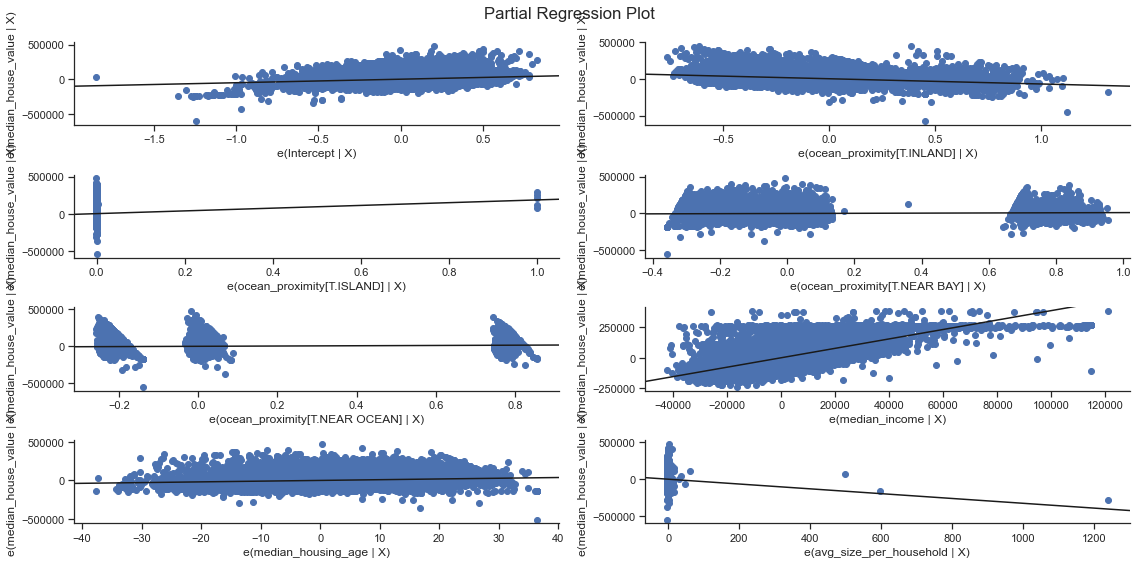

In [41]:
fig = sm.graphics.plot_partregress_grid(lm)
fig.tight_layout(pad=1.0)

Interpretation:

- Inland has a linera influence on the median_house_value, which is reducing the house_value
- Island has a linera influence on the median_house_value which is increasing the house_value
- Near bay has no influence, as well as near ocean
- Median income has a strong linera influence on the median_house_value
- Median_housing_age has a linear influence on the median_house_value, but it is week
- avg_size_per_household has a linera influence on the median_house_value, BUT it might be possible that is it caused be the outliner (household with 1200 people)

Moreover I do not understand how there can be different values for the ocean_proximity variables. I was expecting (e.g. Inland) to have only 0 and 1, as it is displayed for the island, but the values are spreaded between -0.5 and 1. To be honest, I do not understand that

Now lets have a look on them separatly:
Update: after plotting them, I realized that I can not see any benefit (compared to the plot above) here, due to the huge amount of data. Thats why I will remove the other plots and one will stay here but will be commented out

In [42]:
# sm.graphics.plot_partregress(
                            #endog='median_house_value', # response
                            #exog_i ='median_income', # variable of interest
                            #exog_others=['avg_size_per_household', 'ocean_proximity', 'median_housing_age'], # other predictors
                            #data=train_dataset, #dataframe
                            #obs_labels=True # show labels
#);

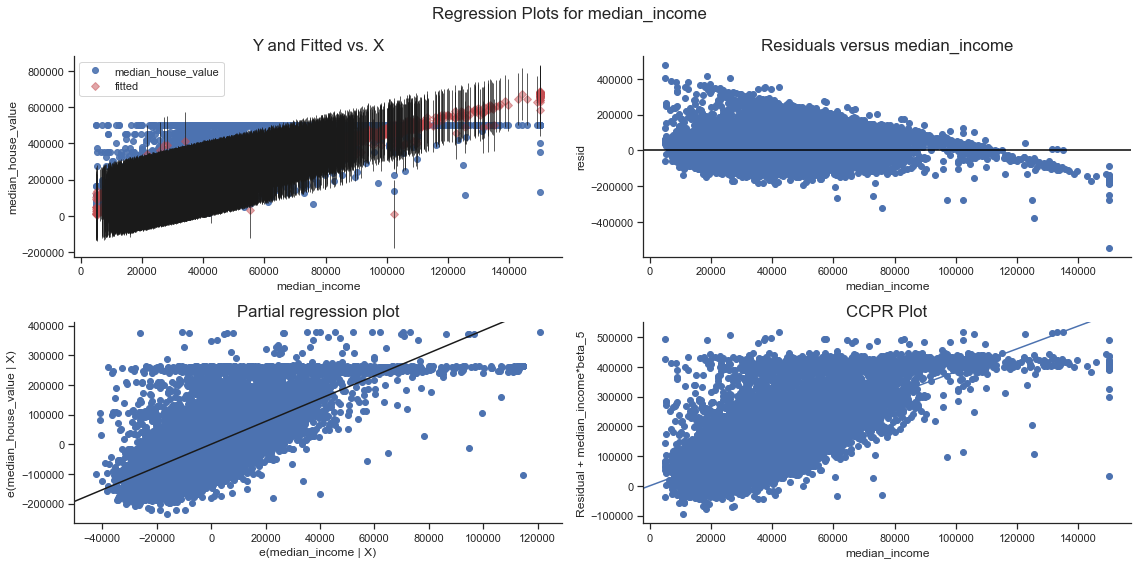

In [43]:
fig = sm.graphics.plot_regress_exog(lm, 'median_income')
fig.tight_layout(pad=1.0)

Interpretation:
- Y and Fitted: Due to the huge amount of data, I can not interpretate it
- Residuals vs median_income: if the median_income increases the Residuals are getting lower
- Partial regression plot: confirmation of linear relationship between median_income and median_house_value, but the data is spraded a lot... Moreover due the amount of data it is hard to make a detailed analysis, because it might be that only 10% are spreaded or it might be that 50% are spreaed, because I do not know how many are close to the line and how many are far awy, it all looks the same. Moreover I can see some outliners, as confirmed by cooks distance, these might bias the influence
- CCPR: linear relationship is confirmed even thoguht there a several outliners, data points with high leverage

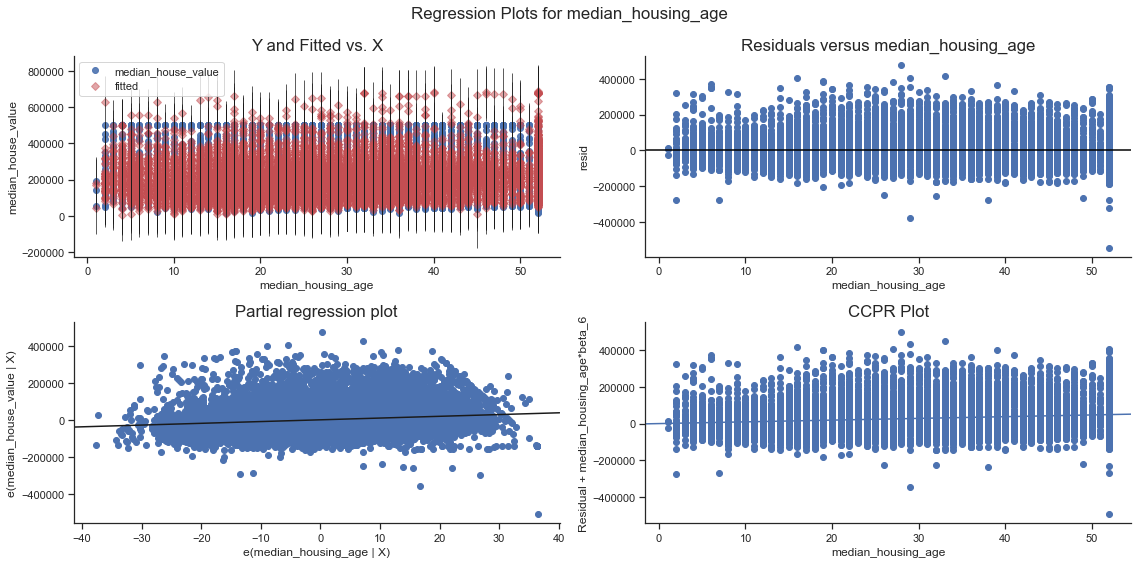

In [44]:
fig = sm.graphics.plot_regress_exog(lm, 'median_housing_age')
fig.tight_layout(pad=1.0)

Interpretation:
- huge gaps between y and fitted
- Residuals vs median_income: seems like it is randomly spreaded
- Partial regression plot: positiv linera relationship but it is small
- CCPR positive linerar relationship but it is small


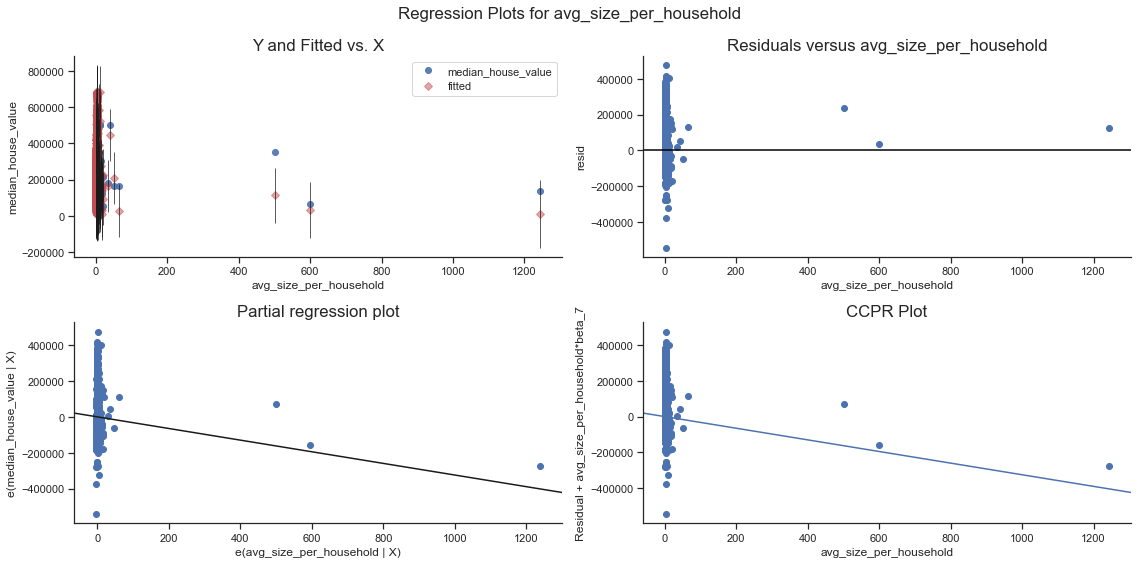

In [45]:
fig = sm.graphics.plot_regress_exog(lm, 'avg_size_per_household')
fig.tight_layout(pad=1.0)

Interpretation:
Seems like the outliners are affecting the results and therefore I am not sure if there is even an influence

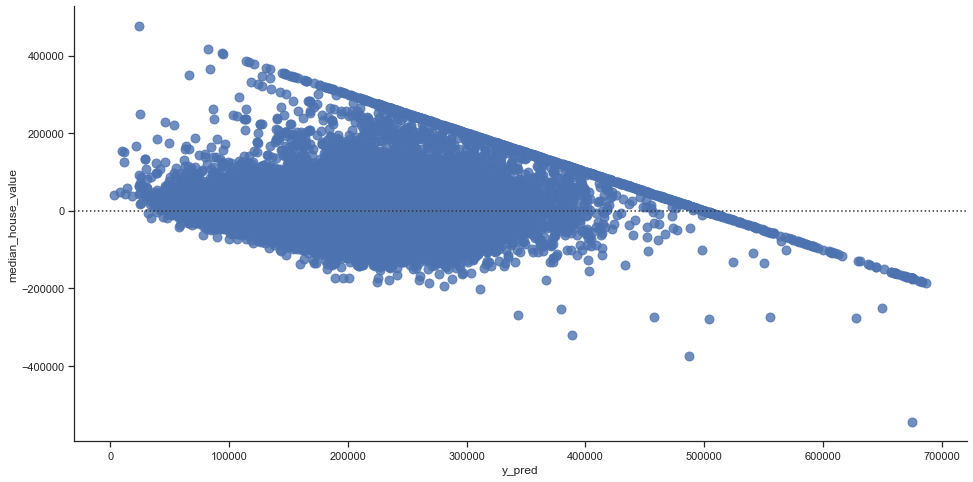

In [46]:
sns.residplot(x="y_pred", y="median_house_value", data=train_dataset, scatter_kws={"s": 80});

Predictions are sometimes far away frrom the acutal value

### Jarque_bera Test

In [47]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kustosis']
test = sm.stats.jarque_bera(lm.resid)

lzip(name,test)

[('Jarque-Bera', 10431.571726810336),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 1.2234846906453096),
 ('Kustosis', 6.054257157053192)]

The p-value is below 0.05 therefore I have to reject H_0, that means that the errors are not spreaded normally.

### Omnisbus- Normtest

In [48]:
name = ['Chi^2', 'Two-tail probability']
test =sm.stats.omni_normtest(lm.resid)
lzip(name, test)

[('Chi^2', 3767.814235551382), ('Two-tail probability', 0.0)]

The p-value is below 0.05 therefore I have to reject H_0, that means that the errors are not spreaded normally.

Now I will drop the outliners which were defined by the cooks distance and have afterwards I will check how much the model has improved

In [49]:
# drop the data which is identified as outliners by the cooks distance
train_dataset.drop(train_dataset.index[out_d], axis=0, inplace=True)

train_dataset

median_housing_age  population  households  median_income  \
18256                36.0        1055         410        61995.0   
3598                 32.0        1040         344        61550.0   
8568                 29.0         686         455        55347.0   
16405                44.0         287          83        33882.0   
17780                33.0         781         169        51082.0   
...                   ...         ...         ...            ...   
3625                 35.0         995         272        37143.0   
19977                20.0         658         247        23937.0   
19601                27.0         449         168        26406.0   
13275                15.0        2554        1057        26582.0   
17495                27.0        1176         416        50294.0   

       median_house_value ocean_proximity  avg_rooms_per_household  \
18256            407200.0        NEAR BAY                     6.31   
3598             257300.0       <1H OCEAN                     7.01   
8568             500001.0       <1H OCEAN                     4.24   
16405            125000.0          INLAND                     7.33   
17780            195800.0       <1H OCEAN                     4.94   
...                   ...             ...                      ...   
3625             178700.0       <1H OCEAN                     5.21   
19977             82100.0          INLAND                    18.79   
19601            129700.0          INLAND                     5.51   
13275            122800.0          INLAND                     4.54   
17495            280200.0      NEAR OCEAN                     6.43   

       avg_bedrooms_per_household  avg_size_per_household         y_pred  
18256                        1.01                    2.57  334030.866301  
3598                         1.10                    3.02  316486.565304  
8568                         1.15                    1.51  290333.766717  
16405                        1.30                    3.46  150440.252241  
17780                        1.07                    4.62  276734.344204  
...                           ...                     ...            ...  
3625                         0.96                    3.66  225435.344258  
19977                        5.26                    2.66   89852.518150  
19601                        1.05                    2.67  105939.755948  
13275                        1.14                    2.42   95358.024014  
17495                        1.01                    2.83  287418.732434  

[15577 rows x 10 columns]

## Model without outliners

In [50]:
# Fit Model
lm = smf.ols(formula='median_house_value ~ median_income + ocean_proximity + median_housing_age + avg_size_per_household', data=train_dataset).fit()

In [51]:
# summary of our model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     6237.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:58:12   Log-Likelihood:            -1.9254e+05
No. Observations:               15577   AIC:                         3.851e+05
Df Residuals:                   15570   BIC:                         3.851e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      7.973e+04   2380.465     33.494      0.000    7.51e+04    8.44e+04
ocean_proximity[T.INLAND]     -6.777e+04   1105.201    -61.316      0.000   -6.99e+04   -6.56e+04
ocean_proximity[T.ISLAND]     -1.496e-10      4e-12    -37.403      0.000   -1.57e-10   -1.42e-10
ocean_proximity[T.NEAR BAY]   -7670.6349   1626.921     -4.715      0.000   -1.09e+04   -4481.680
ocean_proximity[T.NEAR OCEAN]  6119.0299   1473.025      4.154      0.000    3231.730    9006.330
median_income                     4.0809      0.027    149.469      0.000       4.027       4.134
median_housing_age              870.1300     39.323     22.128      0.000     793.053     947.207
avg_size_per_household        -1.394e+04    451.882    -30.854      0.000   -1.48e+04   -1.31e+04
==============================================================================
Omnibus:                     2773.596   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7615.547
Skew:                           0.958   Prob(JB):                         0.00
Kurtosis:                       5.839   Cond. No.                     1.89e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.64e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Intepretation: Model performance increased alot, R-squared increased a lot and also the f-statistic (almost doubled)
Note: If I remove also the median_housing_age as well as the avg_soze_per_household, the R2 reduces and the f1-statistic increases. But the RMSE decreases, therefore I will continue with the model with those 4 predictors

Still no normally distributed errors for the JB and Omnibus test

Durbin watson is at around 2, therefore no autocorrelation is in the model

In [52]:
# Add the regression predictions (as "pred") to our DataFrame
train_dataset['y_pred'] = lm.predict()

train_dataset

median_housing_age  population  households  median_income  \
18256                36.0        1055         410        61995.0   
3598                 32.0        1040         344        61550.0   
8568                 29.0         686         455        55347.0   
16405                44.0         287          83        33882.0   
17780                33.0         781         169        51082.0   
...                   ...         ...         ...            ...   
3625                 35.0         995         272        37143.0   
19977                20.0         658         247        23937.0   
19601                27.0         449         168        26406.0   
13275                15.0        2554        1057        26582.0   
17495                27.0        1176         416        50294.0   

       median_house_value ocean_proximity  avg_rooms_per_household  \
18256            407200.0        NEAR BAY                     6.31   
3598             257300.0       <1H OCEAN                     7.01   
8568             500001.0       <1H OCEAN                     4.24   
16405            125000.0          INLAND                     7.33   
17780            195800.0       <1H OCEAN                     4.94   
...                   ...             ...                      ...   
3625             178700.0       <1H OCEAN                     5.21   
19977             82100.0          INLAND                    18.79   
19601            129700.0          INLAND                     5.51   
13275            122800.0          INLAND                     4.54   
17495            280200.0      NEAR OCEAN                     6.43   

       avg_bedrooms_per_household  avg_size_per_household         y_pred  
18256                        1.01                    2.57  320548.307993  
3598                         1.10                    3.02  316648.350305  
8568                         1.15                    1.51  309777.271539  
16405                        1.30                    3.46  140279.424594  
17780                        1.07                    4.62  252491.965277  
...                           ...                     ...            ...  
3625                         0.96                    3.66  210733.511670  
19977                        5.26                    2.66   89965.850291  
19601                        1.05                    2.67  105993.034637  
13275                        1.14                    2.42   99755.309705  
17495                        1.01                    2.83  275131.375667  

[15577 rows x 10 columns]

In [53]:
# MSE
print('MSE of the model is:', mse(train_dataset['median_house_value'], train_dataset['y_pred']))

#RMSE
print('RMSE of the model is:', rmse(train_dataset['median_house_value'], train_dataset['y_pred']))

MSE of the model is: 3190154789.0435095
RMSE of the model is: 56481.45526669359


Huge improvements at the RMSE

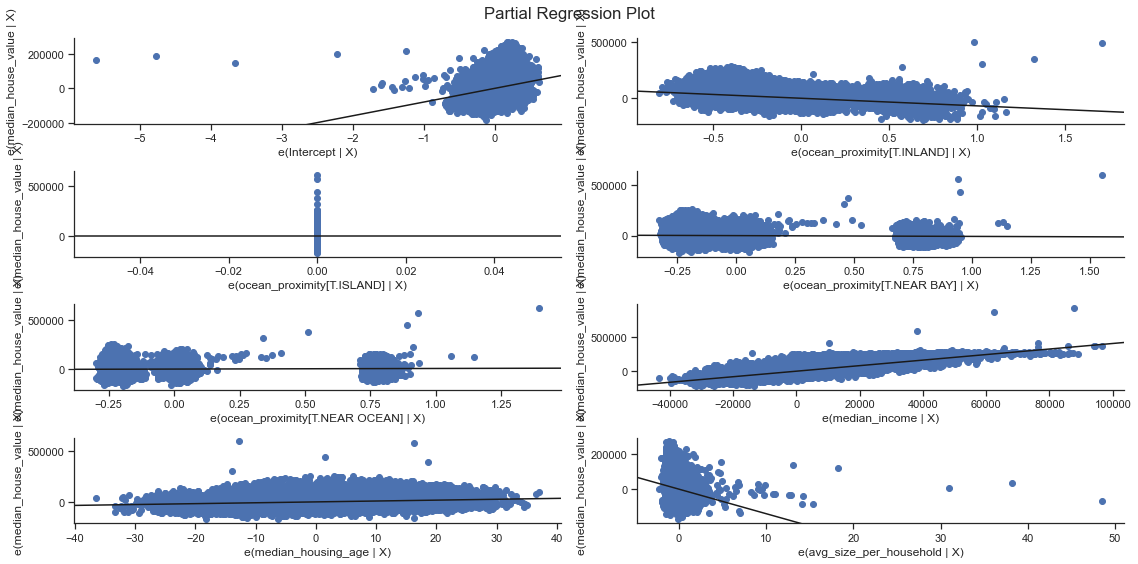

In [54]:
fig = sm.graphics.plot_partregress_grid(lm)
fig.tight_layout(pad=1.0)

Without outliners the graphs are looking way better, for example for the meidan_income the Plot is looking very good and the data spread was reduced successfully. All in all it was very good to remove those points with leverage, it improved the model a lot

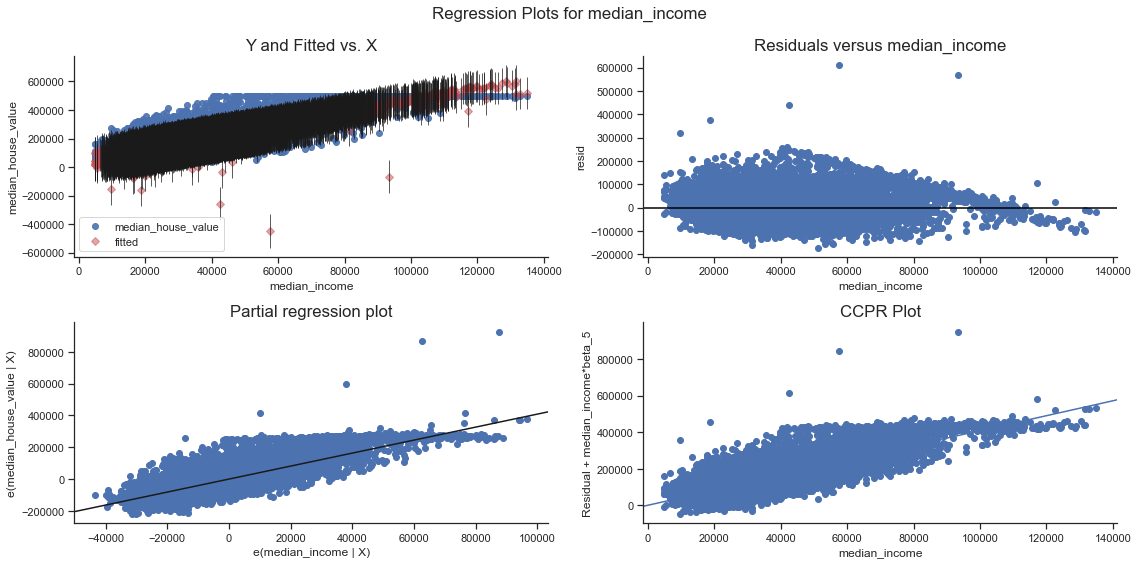

In [55]:
fig = sm.graphics.plot_regress_exog(lm, 'median_income')
fig.tight_layout(pad=1.0)

Huge improvement after the removal of the points with leverage

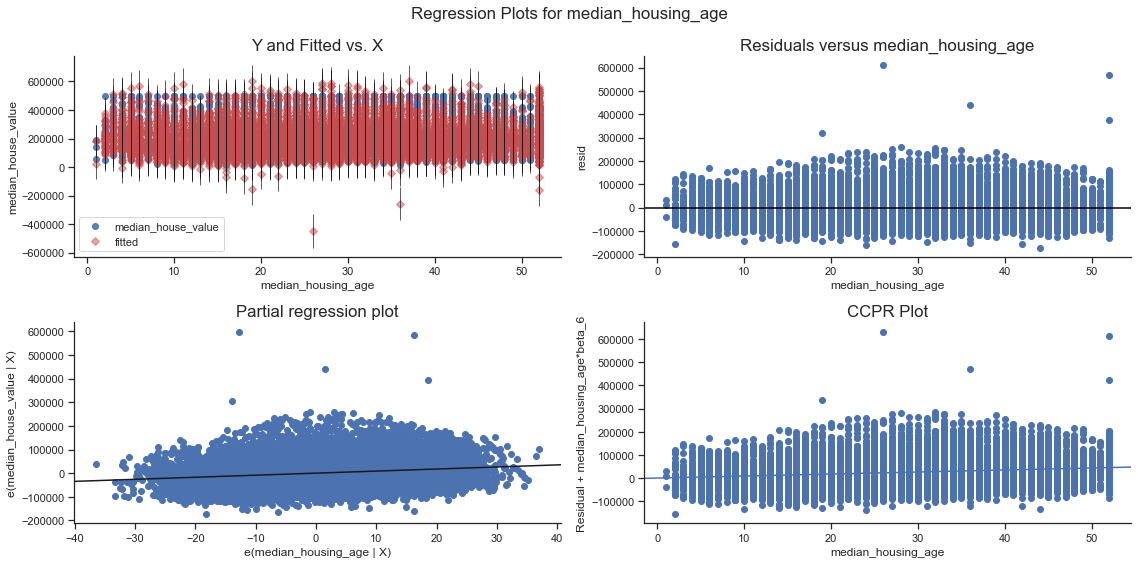

In [56]:
fig = sm.graphics.plot_regress_exog(lm, 'median_housing_age')
fig.tight_layout(pad=1.0)

Improved a bit, but not that much

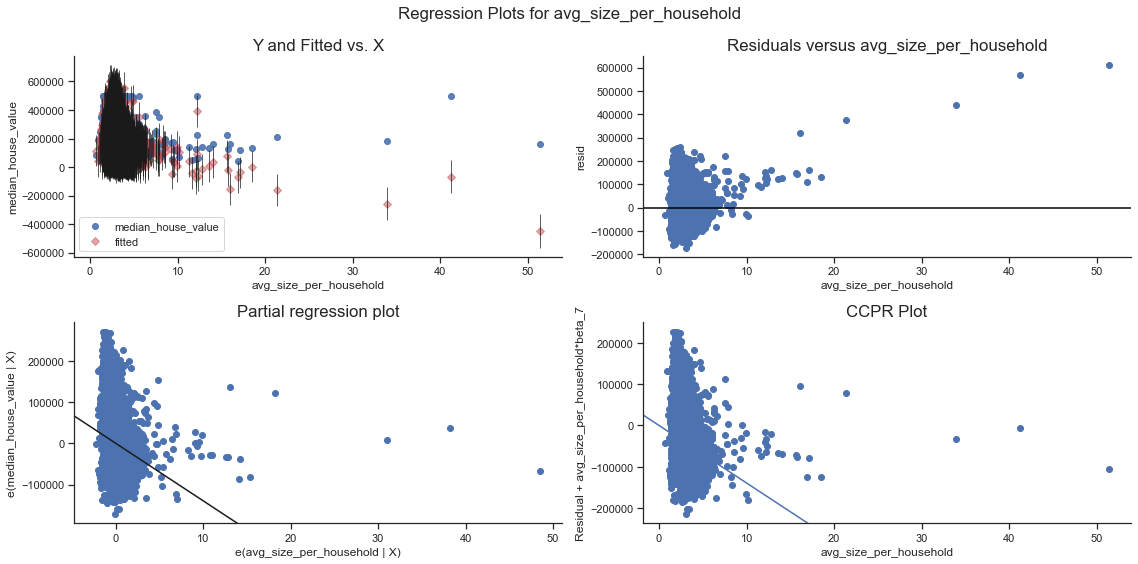

In [57]:
fig = sm.graphics.plot_regress_exog(lm, 'avg_size_per_household')
fig.tight_layout(pad=1.0)

Looks way better than the plots included the outliners/points with high leverage, but still not perfect

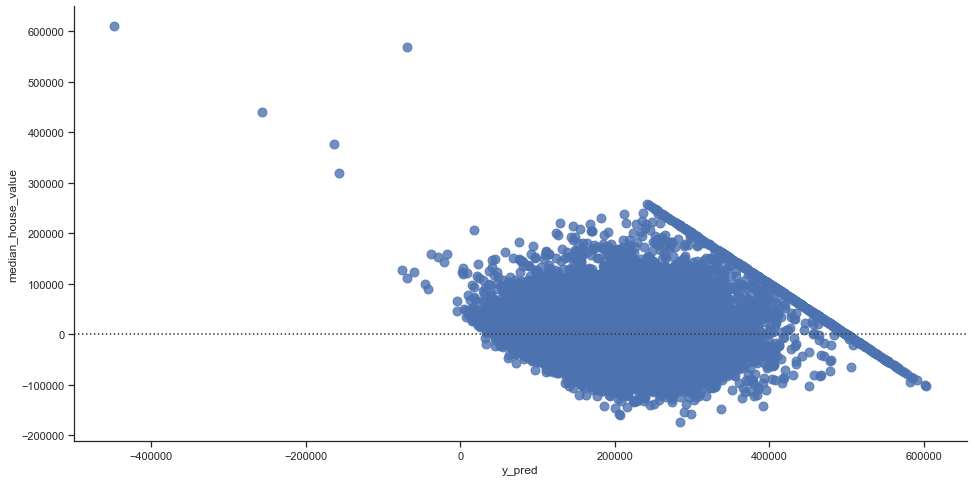

In [58]:
sns.residplot(x="y_pred", y="median_house_value", data=train_dataset, scatter_kws={"s": 80});

## Validation on the test data

In [59]:
# Add regression predictions for the test set (as "pred_test") to our DataFrame
test_dataset['y_pred'] = lm.predict(test_dataset)

In [60]:
test_dataset.head()

median_housing_age  population  households  median_income  \
1                 21.0        2401        1138        83014.0   
2                 52.0         496         177        72574.0   
11                52.0        1504         734        32705.0   
18                50.0         990         419        19911.0   
20                40.0         409         166        13578.0   

    median_house_value ocean_proximity  avg_rooms_per_household  \
1             358500.0        NEAR BAY                     6.24   
2             352100.0        NEAR BAY                     8.29   
11            241800.0        NEAR BAY                     4.77   
18            158700.0        NEAR BAY                     5.34   
20            147500.0        NEAR BAY                     4.52   

    avg_bedrooms_per_household  avg_size_per_household         y_pred  
1                         0.97                    2.11  399685.925461  
2                         1.07                    2.80  374435.289442  
11                        1.02                    2.05  222191.395422  
18                        1.09                    2.36  163918.184091  
20                        1.11                    2.46  127978.416753

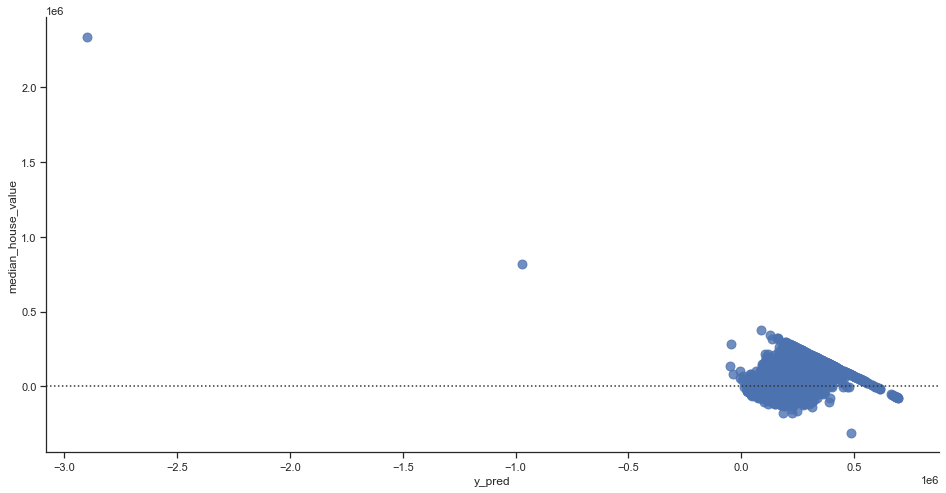

In [61]:
sns.residplot(x="y_pred", y="median_house_value", data=test_dataset, scatter_kws={"s": 80});

The plot looks similar from the distribution compared to the one from the training data set

In [62]:
# MSE
print('MSE of the model is:', mse(test_dataset['median_house_value'], test_dataset['y_pred']))

# RMSE
print('RMSE of the model is:', rmse(test_dataset['median_house_value'], test_dataset['y_pred']))

MSE of the model is: 7821166493.448019
RMSE of the model is: 88437.35915012399


Similar result compared to the training data before the outliners were removed.
Therefore the romoval of the outliners was successfull but also needs to be made on the test data, but from my understanding this is not allowed for the test data, as we want to create a model that works good on the test data, before they are changed/adapted.

## Conclusion

Sadly this model does not fulfill the requirements which were defined for the metrics. The RMSE is over 70.000 and the goal was to be less than 30.000. Therefore futher analysis and evaluation is necessary in the upcoming project, mabye there it is possible to bring this project to end successfully.